**ESERCITAZIONE 9:** Costruzione di un algoritmo genetico per la risoluzione del problema del commesso viaggiatore su 34 punti nello spazio 2D.

**Esercizio 9.1:** Dati 34 punti disposti su una circonferenza (generati con numeri pseudo-casuali), si richiede di implementare un algoritmo genetico per ottimizzare l'ordine con cui si visitano queste località in modo tale da minimizzare il cammino complessivo. 

Si parte quindi da una collezione di 34 punti sulla circonferenza unitaria estratti con un generatore di numeri pseudocasuali, a partire da una distribuzione uniforme su $(0, 2\pi)$ della coordinata angolare. Ogni singola posizione è contrassegnata da un numero intero da 1 a 34, nell'ordine di creazione. 

L'architettura dell'algoritmo è basata sulla manipolazione del vettore che rappresenta la sequenza ordinata di punti, la quale viene valutata in base alla lunghezza $C$ del percorso nell'ordine presentato. In particolare, $C$ è dato dalla sommatoria sui punti, nell'ordine con cui appaiono nella sequenza, della seguente quantità:

$\sqrt((x_{next} - x_{prev})^2 + (y_{next} - y_{prev})^2)$

Il meccanismo di funzionamento è il seguente: si crea una popolazione iniziale di $N$ sequenze di posizioni (denominate $cromosomi$ o $individui$), ciascuna di esse data dalla permutazione pseudo-casuale (effettuata con il metodo di Fischer-Yates) dell'ordinamento inziale $[1, 2, 3, ... , 32, 33, 34]$. 

L'obiettivo è instaurare una evoluzione della popolazione in cui, ad ogni iterazione (detta $generazione$), si ottimizzano i singoli individui, cercando di minimizzare il loro percorso $C$. Per fare ciò, è necessario creare nuove generazioni che vanno a sostituire la popolazione precedente usando gli operatori di Selezione, riproduzione con Crossover e Mutazione.

La Selezione è la prima operazione necessaria per generare una nuova popolazione. Essa prevede innanzitutto la valutazione del costo $C$ di tutti gli individui, a cui segue un ordinamento crescente degli stessi in base a tale valore. Dopodichè, si stabilisce un criterio per generare una coppia di individui che apparterrà alla nuova popolazione. Si assegna a ciascun cromosoma una probabilità di essere selezionato come genitore. In questo caso, si è scelta una probabilità proporzionale all'inverso del costo $C$. I due genitori vengono quindi estratti, in base alla loro probabilità, campionando due numeri pseudo-casuali.

Una scelti i due genitori, si generano due individui della nuova popolazione attraverso la riproduzione con Crossover. Per ciascuno dei due genitori, si estrae una posizione di crossover all'interno del vettore a partire dalla quale si sostitusice la sequenza di punti rimanente con una permutazione di essi. Quest'ultima è data dall'ordine con cui tali numeri compaiono nell'altro genitore. Le due operazioni di riproduzione con Crossover avvengono ad una certa probabilità $p_c$ scelta a priori. Se il Crossover non si verifica, l'individuo nuovo sarà del tutto identico al genitore.

Per finire, si esegue su ciascuno dei due nuovi individui, l'operazione di mutazione. Questo processo è costituito da 3 differenti manipolazioni, ciascuna delle quali avviene con probabilità di mutazione $p_m$. 

1. La prima mutazione consiste in un semplice scambio dei punti in due posizioni estratte casualmente.

2. La seconda mutazione consiste nel selezionare una sequenza di punti all'interno del cromosoma e traslarla verso destra di un opportuno shift, riportando a sinistra gli elementi che prima erano adiacenti a tale sequenza

3. La terza mutazione consiste nel selezionare una sequenza all'interno del cromosoma e invertire la posizione dei singoli punti (riflessione speculare)

Una volta completate le operazioni sui due individui della nuova generazione, si ripetono i passaggi di selezione dei genitori, riproduzione con Crossover e Mutazione fino a che non si ottengono N individui. A questo punto, la nuova popolazione sostituisce la precedente e si ripete iterativamente il processo.

Dunque, gli iperparametri da far variare per ottimizzare l'architettura dell'algoritmo genetico sono rispettivamente il numero $N$ di individui, la probabilità di Crossover $p_c$ e la probabilità di mutazione $p_m$. Mentre il processo di riproduzione con Crossover mira a trasmettere le sequenza di punti che favoriscono la minimizzazione di $C$, producendo successive popolazioni con molti individui performanti (proprietà di $intensificazione$), la mutazione ha l'obiettivo di esplorare lo spazio delle configurazioni in modo tale da conservare una certa biodiversità nelle successive generazioni (proprietà di $diversificazione$). Infatti, la presenza di una opportuna percentuale di individui poco performanti permette alla popolazione di generare nuovi cromosomi potenzialmente più adatti rispetto a quelli migliori contenuti in essa, evitando di fatto di far convergere l'algoritmo, generazione dopo generazione, ad una popolazione di individui tutti identici. Tale situazione, paragonabile ad un minimo locale, impedirebbe di raggiungere il risultato corretto, ovvero la sequenza che rappresenta il minimo globale per $C$.


Al variare degli iperparametri appena descritti, si sono ricercate, concedendo al sistema $1000$ generazioni, alcune combinazioni che portassero alla convergenza dell'algoritmo entro poche centinaia di generazioni. In seguito ad una sommaria ricerca, si è osservato che tale proprietà è più frequentemente verificata mantenendo una $p_c$ superiore a $0.6$, per cui si è deciso di porre tale probabilità ad un valore intorno a $0.8$ in tutti gli esempi in seguito riportati.

Partendo da $N = 45$, si è osservato come le prestazioni dell'algoritmo siano sensibilmente influenzate dallo spazio dei parametri $(p_m,p_c)$, per cui si è resa necessaria una ricerca dettagliata della probabilità di Mutazione. Fissando $p_m = 0.17$ e $p_c = 0.8$, l'algoritmo arriva a convergenza dopo circa $250$ generazioni.

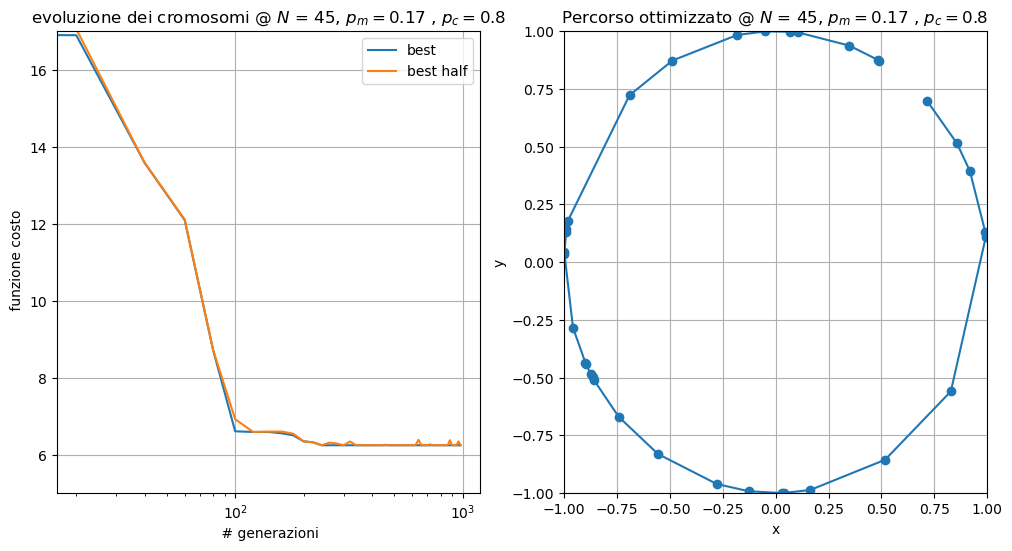

L'ordine dei punti da visitare per minimizzare il cammino è il seguente: 
[ 1  8 21 14 19 10 12 13 26 22  3  7  9 33 32 20 34 16  6 18 28 25 27  5
 31 11  4 17 29 30 23 24  2 15]


In [7]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

# --- Acquisizione dell'evoluzione dei cromosomi nelle generazioni

#Lettura file
filename = "45_Stats.txt"
G = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Gen','Best','Media') , header = 0)

#estrarre i dati dalle colonne del file di testo
G['Gen'] = pd.to_numeric(G['Gen'] , errors = 'coerce')
G['Best'] = pd.to_numeric(G['Best'] , errors = 'coerce')
G['Media'] = pd.to_numeric(G['Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
generation_vector = G['Gen']
best_vector = G['Best']
media_vector = G['Media']

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  
plt.plot(generation_vector,best_vector, label = 'best')
plt.plot(generation_vector, media_vector, label = 'best half')
plt.title("evoluzione dei cromosomi @ $N$ = 45, $p_m = 0.17$ , $p_c = 0.8$")
plt.xlabel(" # generazioni")
plt.ylim(5,17)
plt.xscale('log')
plt.ylabel(" funzione costo")
plt.grid(True)
plt.legend()

# --- Acquisizione della sequenza di numeri dell'esemplare finale

#Lettura file
filename = "45_Final_sequence.txt"
C = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('#','X','Y'))

#estrarre i dati dalle colonne del file di testo
C['#'] = pd.to_numeric(C['#'] , errors = 'coerce')
C['X'] = pd.to_numeric(C['X'] , errors = 'coerce')
C['Y'] = pd.to_numeric(C['Y'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
city_vector = C['#']
X_vector = C['X']
Y_vector = C['Y']

plt.subplot(1,2,2)
plt.plot(X_vector , Y_vector , marker = 'o' ,  linestyle = '-')
plt.title("Percorso ottimizzato @ $N$ = 45, $p_m = 0.17$ , $p_c = 0.8$ ")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

print("L'ordine dei punti da visitare per minimizzare il cammino è il seguente: ")
print(np.array(city_vector))

Dal grafico dell'andamento di $C$ in funzione del numero di generazioni, è evidente come, già dopo 100 iterazioni, in ogni popolazione almeno metà degli individui siano identici a quello più performante della stessa. Inoltre, il grafico che mostra il percorso corrispondente all'invividuo più performante dell'ultima generazione, conferma la convergenza al più breve cammino possibile. Quest'ultimo, dato di una $C$ pari a circa $6.23$, è ovviamente quello ottenuto percorrendo i punti sulla circonferenza in senso orario o antiorario, scegliendo come punto successivo la posizione adiacente a quello precedente nel verso di percorrenza.

Successivamente, si è studiata la convergenza dell'algoritmo impiegando $N = 100$. Con tale scelta, si è osservata la possibilità di raggiungere ottime prestazioni anche impiegando una $p_m$ inferiore al $10 \%$. In particolare, si riporta l'esempio con $p_m = 0.05$ e $p_c = 0.8$:

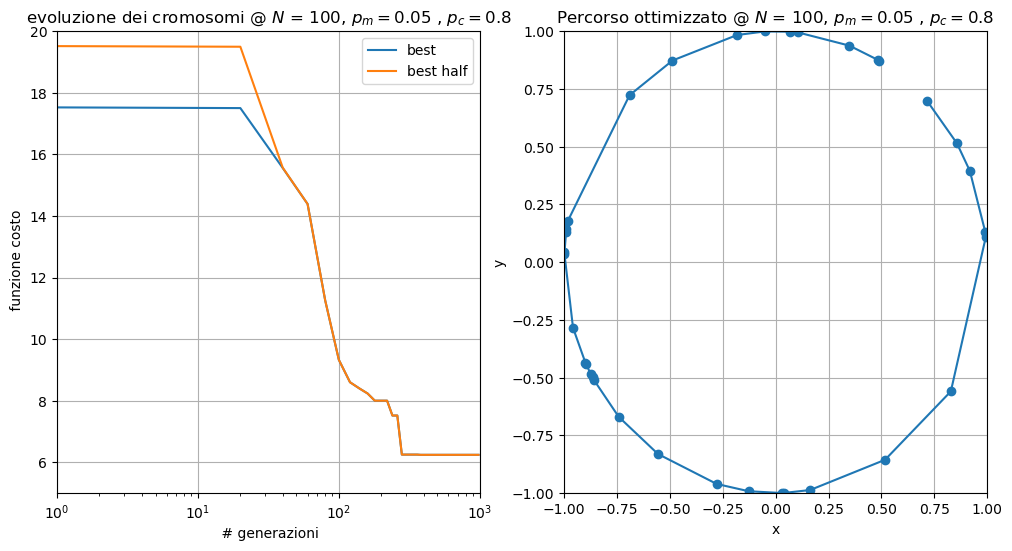

L'ordine dei punti da visitare per minimizzare il cammino è il seguente: 
[ 1  8 21 14 19 10 12 13 26 22  3  7  9 33 32 20 34 16  6 18 28 25 27  5
 31 11  4 17 29 30 23 24  2 15]


In [6]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

# --- Acquisizione dell'evoluzione dei cromosomi nelle generazioni

#Lettura file
filename = "100_Stats.txt"
G = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Gen','Best','Media') , header = 0)

#estrarre i dati dalle colonne del file di testo
G['Gen'] = pd.to_numeric(G['Gen'] , errors = 'coerce')
G['Best'] = pd.to_numeric(G['Best'] , errors = 'coerce')
G['Media'] = pd.to_numeric(G['Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
generation_vector = G['Gen']
best_vector = G['Best']
media_vector = G['Media']

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  
plt.plot(generation_vector,best_vector, label = 'best')
plt.plot(generation_vector, media_vector, label = 'best half')
plt.title("evoluzione dei cromosomi @ $N$ = 100, $p_m = 0.05$ , $p_c = 0.8$")
plt.xlabel(" # generazioni")
plt.ylim(5,20)
plt.xlim(1,1000)
plt.xscale('log')
plt.ylabel(" funzione costo")
plt.grid(True)
plt.legend()

# --- Acquisizione della sequenza di numeri dell'esemplare finale

#Lettura file
filename = "100_Final_sequence.txt"
C = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('#','X','Y'))

#estrarre i dati dalle colonne del file di testo
C['#'] = pd.to_numeric(C['#'] , errors = 'coerce')
C['X'] = pd.to_numeric(C['X'] , errors = 'coerce')
C['Y'] = pd.to_numeric(C['Y'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
city_vector = C['#']
X_vector = C['X']
Y_vector = C['Y']

plt.subplot(1,2,2)
plt.plot(X_vector , Y_vector , marker = 'o' ,  linestyle = '-')
plt.title("Percorso ottimizzato @ $N$ = 100, $p_m = 0.05$ , $p_c = 0.8$ ")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

print("L'ordine dei punti da visitare per minimizzare il cammino è il seguente: ")
print(np.array(city_vector))

Dal grafico dell'evoluzione del costo $C$, si evidenzia come, già dopo 40 generazioni, più della metà dei cromosomi di una popolazione sia diventata identica al cromosoma più performante della stessa. Tale proprietà è giustificata dal fatto di aver utilizzato una propbabilità di mutazione di appena il $5 \%$, che riduce sensibilmente la biodiversità dell'algoritmo genetico. 

Tuttavia, il risultato degno di nota consiste nel fatto che, nonostante questa riduzione, il sistema riesce comunque a convergere entro $300$ generazioni. Questo è prevalentemente dovuto al fatto di aver impiegato un numero elevato di individui: anche se all'interno di una singola popolazione la percentuale di cromosomi diversi dal best-fit è piccola, il loro numero assoluto rimane comunque sufficiente a garantire un'opportuna fonte di diversificazione. In tal modo, ad ogni popolazione, l'algorimto rimarrà in possesso di abbastanza biodiversità per progredire verso la convergenza.

Successivamente, si testa l'algoritmo tenendo $N$ fissato, ma raddoppiando la $p_m$ a $0.1$, per valutarne la robustezza sullo spazio dei parametri.

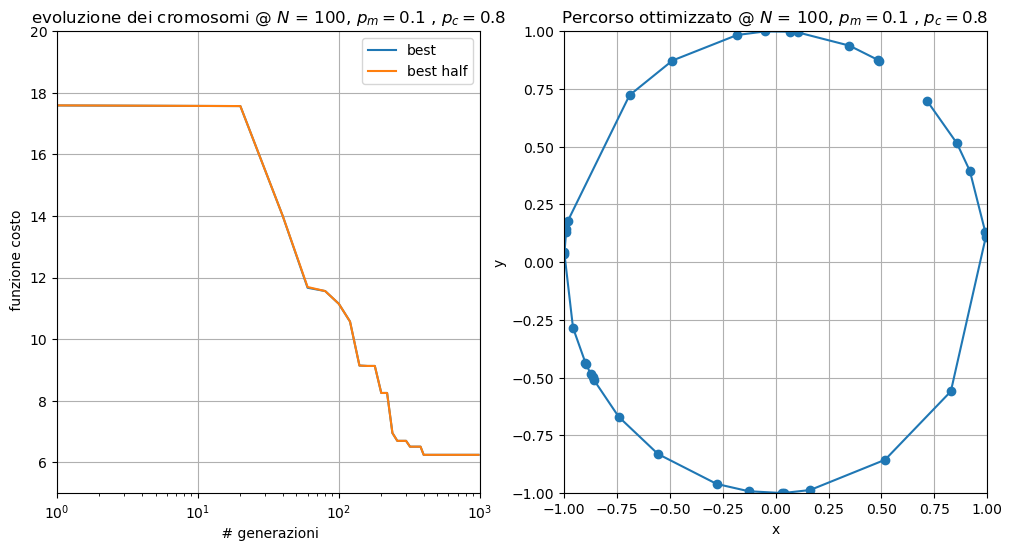

L'ordine dei punti da visitare per minimizzare il cammino è il seguente: 
[ 1  8 21 14 19 10 12 13 26 22  3  7  9 33 32 20 34 16  6 18 28 25 27  5
 31 11  4 17 29 30 23 24  2 15]


In [5]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

# --- Acquisizione dell'evoluzione dei cromosomi nelle generazioni

#Lettura file
filename = "100_alt_Stats.txt"
G = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Gen','Best','Media') , header = 0)

#estrarre i dati dalle colonne del file di testo
G['Gen'] = pd.to_numeric(G['Gen'] , errors = 'coerce')
G['Best'] = pd.to_numeric(G['Best'] , errors = 'coerce')
G['Media'] = pd.to_numeric(G['Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
generation_vector = G['Gen']
best_vector = G['Best']
media_vector = G['Media']

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  
plt.plot(generation_vector,best_vector, label = 'best')
plt.plot(generation_vector, media_vector, label = 'best half')
plt.title("evoluzione dei cromosomi @ $N$ = 100, $p_m = 0.1$ , $p_c = 0.8$")
plt.xlabel(" # generazioni")
plt.ylim(5,20)
plt.xlim(1,1000)
plt.xscale('log')
plt.ylabel(" funzione costo")
plt.grid(True)
plt.legend()

# --- Acquisizione della sequenza di numeri dell'esemplare finale

#Lettura file
filename = "100_alt_Final_sequence.txt"
C = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('#','X','Y'))

#estrarre i dati dalle colonne del file di testo
C['#'] = pd.to_numeric(C['#'] , errors = 'coerce')
C['X'] = pd.to_numeric(C['X'] , errors = 'coerce')
C['Y'] = pd.to_numeric(C['Y'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
city_vector = C['#']
X_vector = C['X']
Y_vector = C['Y']

plt.subplot(1,2,2)
plt.plot(X_vector , Y_vector , marker = 'o' ,  linestyle = '-')
plt.title("Percorso ottimizzato @ $N$ = 100, $p_m = 0.1$ , $p_c = 0.8$ ")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

print("L'ordine dei punti da visitare per minimizzare il cammino è il seguente: ")
print(np.array(city_vector))

Si osserva che l'algoritmo riesce a convergere dopo $400$ generazioni, validando l'ipotesi secondo cui il sistema con $N = 100$ presenta una notevole robustezza delle prestazioni sullo spazio dei parametri.

In conclusione, l'utilizzo di un numero elevato di individui permette di costruire algoritmi con prestazioni soddisfacenti su un certo insieme dello spazio dei parametri: anche imponendo una probabilità di Mutazione inferiore al $10 \%$, si raggiunge comunque la convrgenza.

L'esperimento è in seguito ripetuto con 34 punti generati all'interno del quadrato $[-0.5,0.5] \ X  \ [-0.5,0.5]$. Si riporta l'esempio dell'algoritmo con $N = 100$, $p_m = 0.116$ e $p_c = 0.794$:

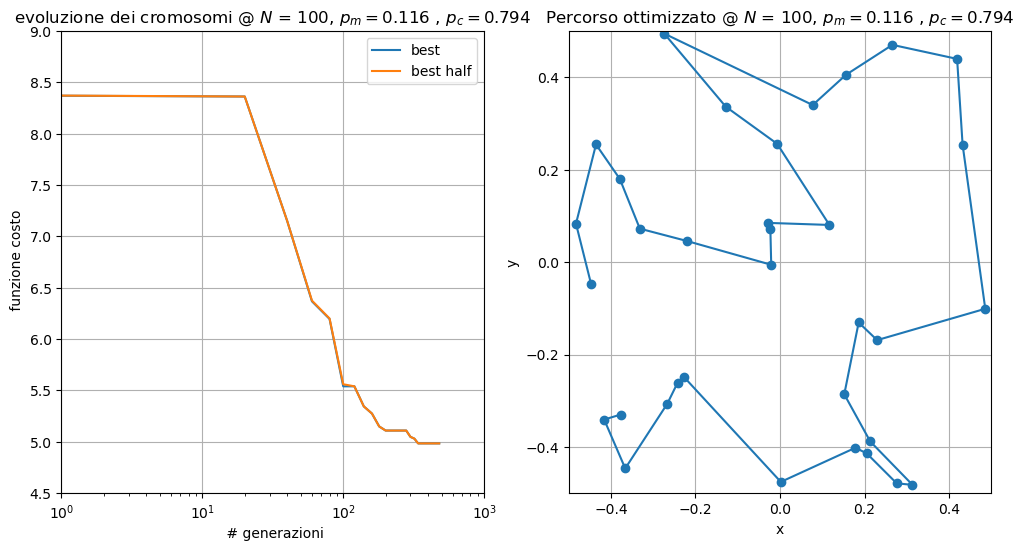

L'ordine dei punti da visitare per minimizzare il cammino è il seguente: 
[ 1 18 31 12 15 34 20 23  4  7 30 32 22 21  2 33 19 29 27  5 25 28  6 13
 17 16  3 14  9  8 24 11 10 26]


In [4]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

# --- Acquisizione dell'evoluzione dei cromosomi nelle generazioni

#Lettura file
filename = "100_Stats_square.txt"
G = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Gen','Best','Media') , header = 0)

#estrarre i dati dalle colonne del file di testo
G['Gen'] = pd.to_numeric(G['Gen'] , errors = 'coerce')
G['Best'] = pd.to_numeric(G['Best'] , errors = 'coerce')
G['Media'] = pd.to_numeric(G['Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
generation_vector = G['Gen']
best_vector = G['Best']
media_vector = G['Media']

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  
plt.plot(generation_vector,best_vector, label = 'best')
plt.plot(generation_vector, media_vector, label = 'best half')
plt.title("evoluzione dei cromosomi @ $N$ = 100, $p_m = 0.116$ , $p_c = 0.794$")
plt.xlabel(" # generazioni")
plt.ylim(4.5,9)
plt.xlim(1,1000)
plt.xscale('log')
plt.ylabel(" funzione costo")
plt.grid(True)
plt.legend()

# --- Acquisizione della sequenza di numeri dell'esemplare finale

#Lettura file
filename = "100_Final_sequence_square.txt"
C = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('#','X','Y'))

#estrarre i dati dalle colonne del file di testo
C['#'] = pd.to_numeric(C['#'] , errors = 'coerce')
C['X'] = pd.to_numeric(C['X'] , errors = 'coerce')
C['Y'] = pd.to_numeric(C['Y'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
city_vector = C['#']
X_vector = C['X']
Y_vector = C['Y']

plt.subplot(1,2,2)
plt.plot(X_vector , Y_vector , marker = 'o' ,  linestyle = '-')
plt.title("Percorso ottimizzato @ $N$ = 100, $p_m = 0.116$ , $p_c = 0.794$ ")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.grid(True)
plt.show()

print("L'ordine dei punti da visitare per minimizzare il cammino è il seguente: ")
print(np.array(city_vector))

La principale osservazione riguarda la scarsa robustezza dell'algoritmo sullo spazio dei parametri: si è resa necessaria una ricerca fine dei valori di $(p_m , p_c)$ fino alla terza cifra significativa per costruire un algoritmo che convergesse al valore ritenuto il minimo assoluto di $C$ (quest'ultimo dipende fortemente dalle posizioni dei punti generati nel quadarto 2D, in questo caso è circa $4.98$). Questo è dovuto al fatto che, differentemente dal caso dei punti su una circonferenza, le posizioni sono state estratte su un insieme dato da due coordiate indipendenti. In particolare, nel caso della circonferenza, nell'eventualità che $3$ o più punti venissero generati in posizioni ravvicinate, essi giacevano su una varietà di ordine 1 localmente approssimabile alla retta tangente a tale varietà. Questo fatto garantiva che la lunghezza del percorso attraverso tali punti dipendesse fortemente dall'ordine con cui tali località erano percorse. Differentemente, l'estrazione di punti all'interno del quadrato può portare a generare dei cluster di posizioni (come ad esempio quello visibile in $(0.2 , -0.4)$) che non sono localmente disposti attorno a una retta. Questo comporta una maggiore difficoltà nella determinazione della sequenza con cui questo cluster deve essere percorso per minimizzare la lunghezza del cammino: diverse combinazioni possono portare a risultati molto simili.